SimArray([[6.6544048e-28, 6.6955686e-28, 6.7367335e-28, ...,
           7.4328459e-28, 7.4019896e-28, 7.3711348e-28],
          [6.6723111e-28, 6.7121456e-28, 6.7519796e-28, ...,
           7.4302551e-28, 7.4002910e-28, 7.3703254e-28],
          [6.6902174e-28, 6.7287221e-28, 6.7672267e-28, ...,
           7.4276656e-28, 7.3985913e-28, 7.3695160e-28],
          ...,
          [6.3616085e-28, 6.4677615e-28, 6.5739144e-28, ...,
           6.4213908e-28, 6.4206219e-28, 6.4198535e-28],
          [6.3110254e-28, 6.4134993e-28, 6.5159728e-28, ...,
           6.3841838e-28, 6.3846528e-28, 6.3851222e-28],
          [6.2604409e-28, 6.3592358e-28, 6.4580312e-28, ...,
           6.3469758e-28, 6.3486836e-28, 6.3503910e-28]], dtype=float32, 'g cm**-3')

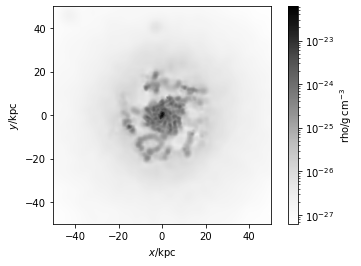

In [2]:
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pylab as plt

# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')
s.physical_units()

# load the halos
h = s.halos()

# center on the largest halo and align the disk
pynbody.analysis.angmom.faceon(h[1])

#create a simple slice of gas density
sph.image(h[1].g,qty="rho",units="g cm^-3",width=100,cmap="Greys")

SimArray([[0.00028574, 0.00028663, 0.00028751, ..., 0.00028522,
           0.0002843 , 0.00028338],
          [0.00028629, 0.00028718, 0.00028807, ..., 0.0002859 ,
           0.00028498, 0.00028406],
          [0.00028683, 0.00028773, 0.00028863, ..., 0.00028658,
           0.00028566, 0.00028474],
          ...,
          [0.00026118, 0.0002621 , 0.00026303, ..., 0.00027751,
           0.00027675, 0.000276  ],
          [0.00026035, 0.00026125, 0.00026215, ..., 0.00027697,
           0.00027622, 0.00027548],
          [0.00025951, 0.00026039, 0.00026127, ..., 0.00027643,
           0.0002757 , 0.00027496]], dtype=float32, 'g cm**-2')

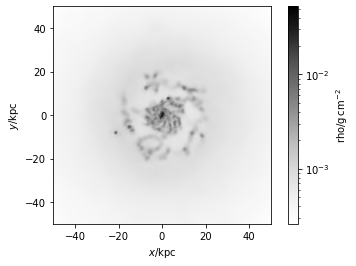

In [9]:
# short hand for pynbody plot
import pynbody.plot.sph as sph
import matplotlib.pylab as plt

# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')
s.physical_units()

# load the halos
h = s.halos()

# center on the largest halo and align the disk
pynbody.analysis.angmom.faceon(h[1])

#create an image of gas density integrated down the line of site (z axis)
sph.image(h[1].g,qty="rho",units="g cm^-2",width=100,cmap="Greys")

In [ ]:
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pylab as plt

# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')
s.physical_units()

# load the halos
h = s.halos()

# center on the largest halo and align the disk
# So there needs to be enough particles around the center to get the velocity
# if (len(h.gas) > 0) halos two and three don't have any gas particles therefore
# this if-else statement fails and this arguement doesn't work.
pynbody.analysis.angmom.faceon(h[1])

#create a simple slice showing the gas temperature
sph.image(h[1].g,qty="temp",width=50,cmap="YlOrRd", denoise=True,approximate_fast=False)

SimArray([[2.80733960e+03, 2.84564990e+03, 2.88395972e+03, ...,
           1.91307223e+00, 1.69086814e+00, 1.46866405e+00],
          [2.83623682e+03, 2.87456836e+03, 2.91289966e+03, ...,
           1.98871160e+00, 1.75894582e+00, 1.52917945e+00],
          [2.86513354e+03, 2.90348633e+03, 2.94183936e+03, ...,
           2.06435132e+00, 1.82702315e+00, 1.58969498e+00],
          ...,
          [9.46049951e-03, 1.11643225e-02, 1.28681455e-02, ...,
           6.66372412e+03, 6.77362305e+03, 6.88352246e+03],
          [7.09696440e-03, 8.53458419e-03, 9.97220445e-03, ...,
           6.61646875e+03, 6.71213574e+03, 6.80780273e+03],
          [4.73342929e-03, 5.90484682e-03, 7.07626343e-03, ...,
           6.56921387e+03, 6.65064844e+03, 6.73208350e+03]], dtype=float32, 'Msol kpc**-2')

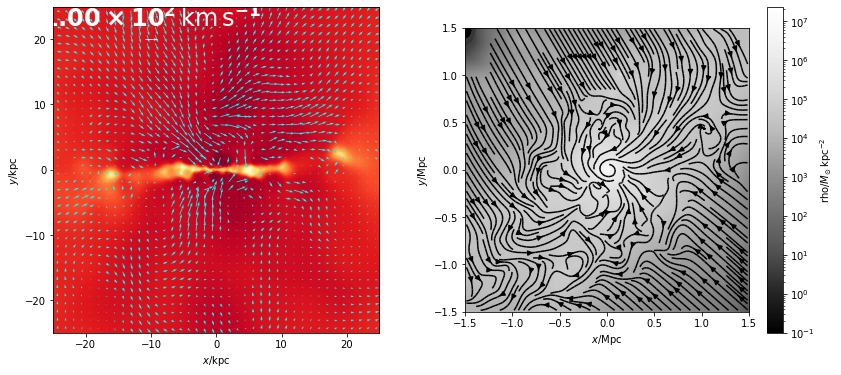

In [12]:
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pylab as plt

# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')
s.physical_units()

# load the halos
h = s.halos()

# center on the largest halo and align the disk
pynbody.analysis.angmom.sideon(h[1])

# create the subplots
f, axs = plt.subplots(1,2,figsize=(14,6))

#create a simple slice showing the gas temperature, with velocity vectors overlaid
sph.velocity_image(h[1].g, vector_color="cyan", qty="temp",width=50,cmap="YlOrRd", 
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = False)

#you can also make a stream visualization instead of a quiver plot
pynbody.analysis.angmom.faceon(h[1])
s['pos'].convert_units('Mpc')
sph.velocity_image(s.g, width='3 Mpc', cmap = "Greys_r", mode='stream', units='Msol kpc^-2', 
                   density = 2.0, vector_resolution=100, vmin=1e-1,subplot=axs[1], 
                   show_cbar=True, vector_color='black')

No H2 data found in StarLog file


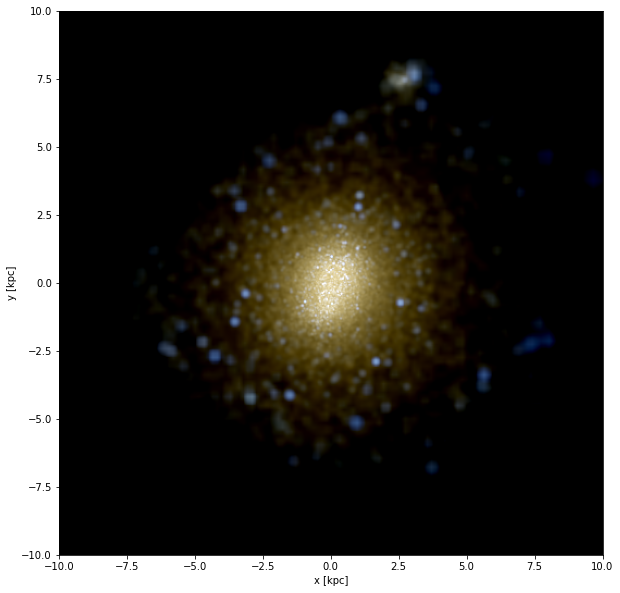

In [22]:
import pynbody
import matplotlib.pylab as plt

# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')
s.physical_units()

# load the halos
h = s.halos()

# change figure size
plt.figure(figsize=(10,10))

# center on the largest halo and align the disk
pynbody.analysis.angmom.faceon(h[1])

#create an image using the default bands (i, v, u)
pynbody.plot.stars.render(s,width='20 kpc')